**Outline:**

1. [Libraries and settings](#1-bullet)


## 1. [Libraries and settings](#1-bullet)

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf

In [46]:
file_path = './Dataset/VCB.csv'

df = pd.read_csv(file_path)

df['time'] = pd.to_datetime(df['time'], format='%m/%d/%Y')
df.set_index('time', inplace=True)


new_dataset = df[['volume']]
new_dataset.index = df.index

sns.set(style='darkgrid')


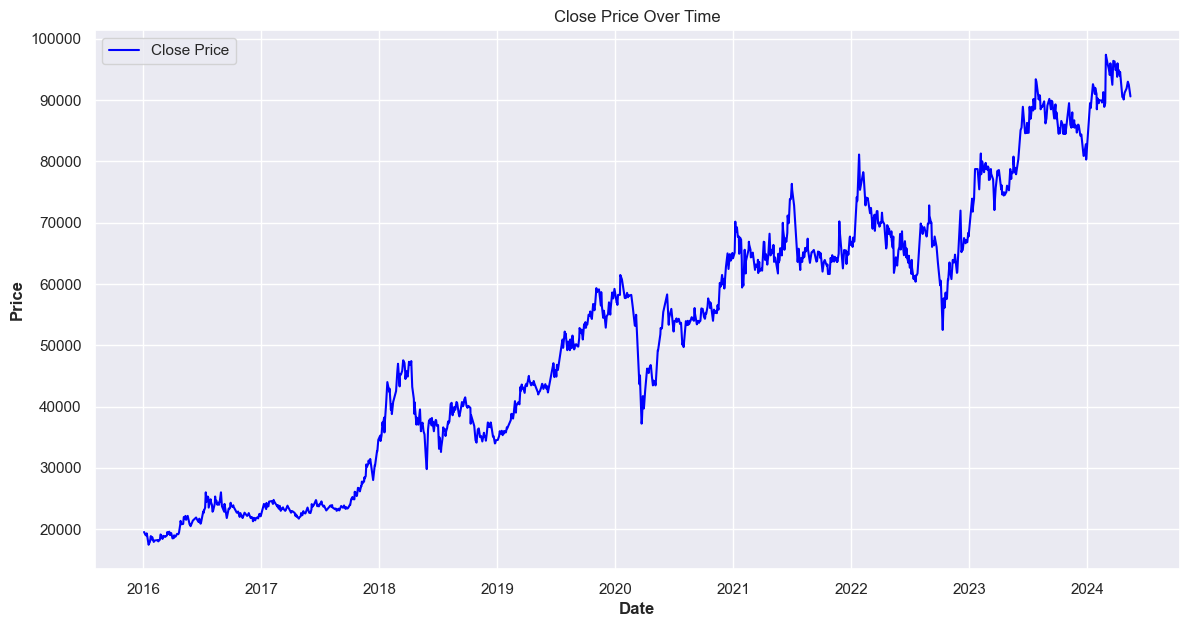

In [47]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['close'], label='Close Price', color='blue')
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Moving Average (MA) and Exponential Moving Average (EMA)

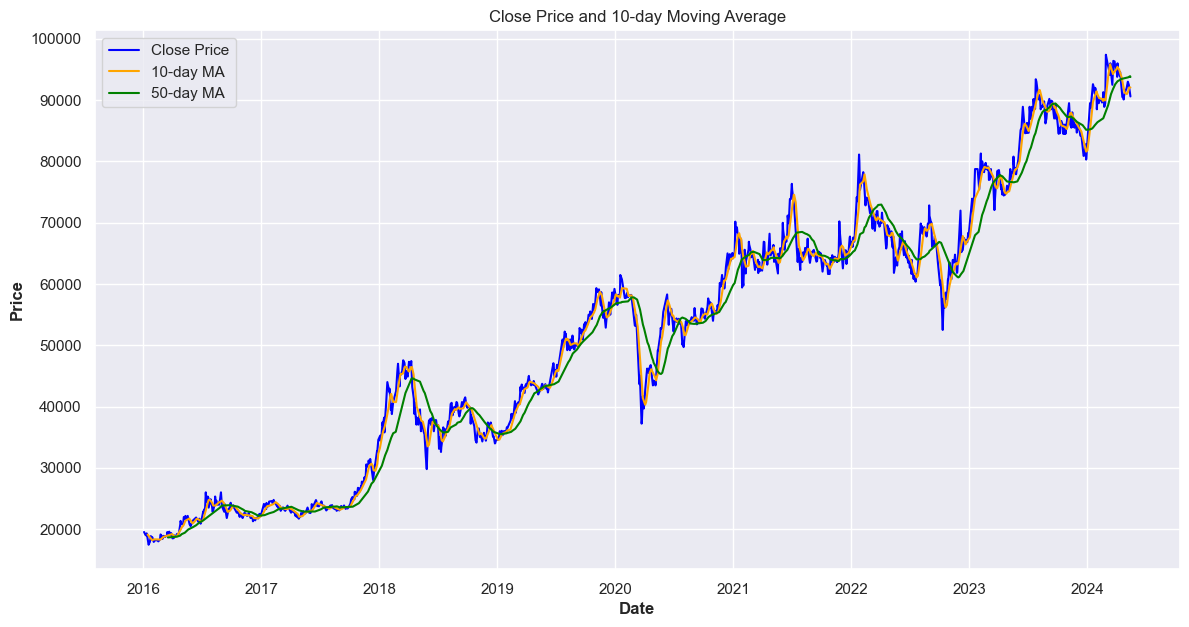

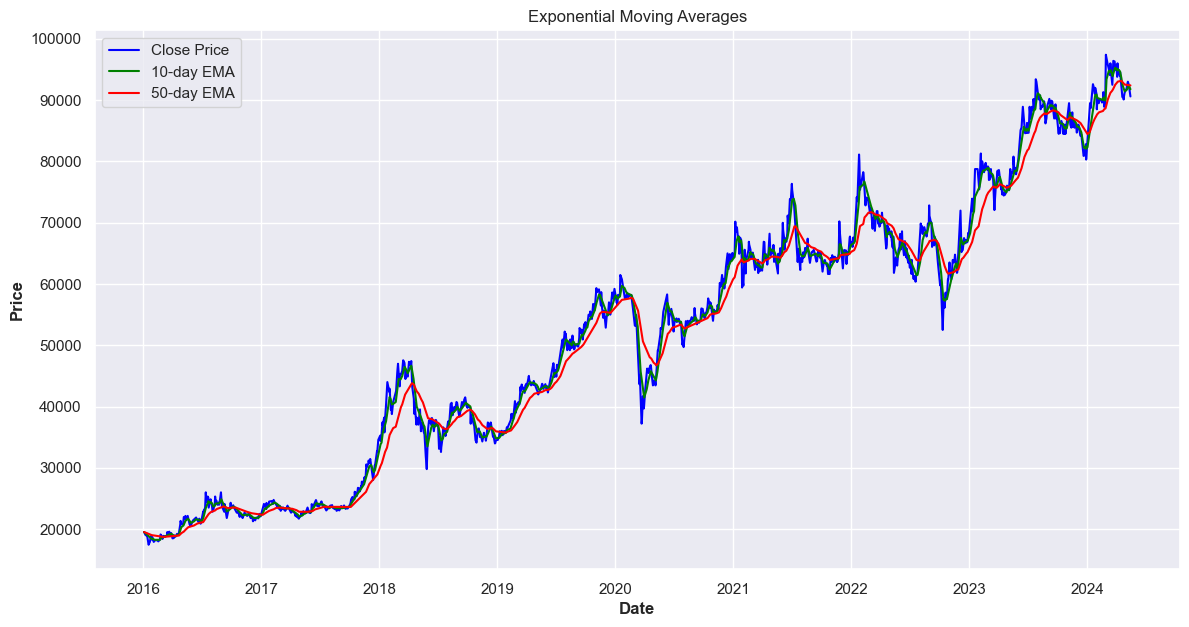

In [48]:
df['MA_10'] = df['close'].rolling(window=10).mean()  # 10-day Moving Average
df['MA_50'] = df['close'].rolling(window=50).mean()

# Biểu đồ MA
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['close'], label='Close Price', color='blue')
plt.plot(df.index, df['MA_10'], label='10-day MA', color='orange')
plt.plot(df.index, df['MA_50'], label='50-day MA', color='green')
plt.title('Close Price and 10-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


# Exponential Moving Average (EMA)
df['EMA_10'] = df['close'].ewm(span=10, adjust=False).mean()
df['EMA_50'] = df['close'].ewm(span=50, adjust=False).mean()

# Biểu đồ EMA
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['close'], label='Close Price', color='blue')
plt.plot(df.index, df['EMA_10'], label='10-day EMA', color='green')
plt.plot(df.index, df['EMA_50'], label='50-day EMA', color='red')
plt.title('Exponential Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()



# Relative Strength Index (RSI)

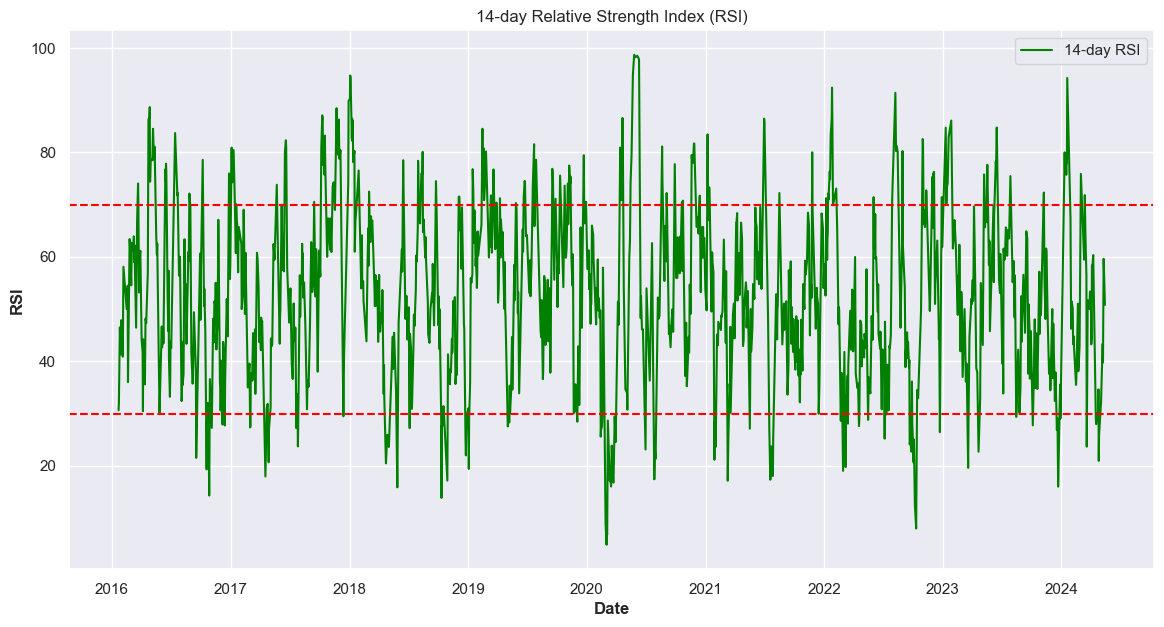

In [49]:

def calculate_rsi(data, window):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df['RSI_14'] = calculate_rsi(df['close'], 14)  # 14-day RSI

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['RSI_14'], label='14-day RSI', color='green')
plt.axhline(y=70, color='red', linestyle='--')
plt.axhline(y=30, color='red', linestyle='--')
plt.title('14-day Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()



# Moving Average Convergence Divergence (MACD)

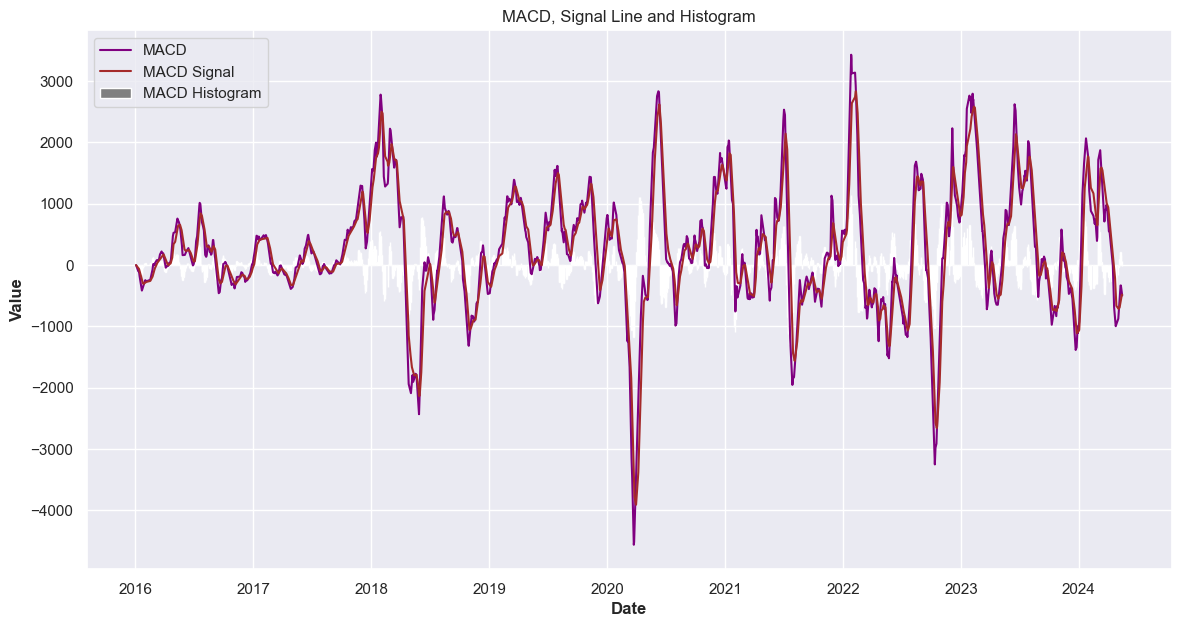

In [50]:

short_window = 12
long_window = 26
signal_window = 9

df['EMA_12'] = df['close'].ewm(span=short_window, adjust=False).mean()
df['EMA_26'] = df['close'].ewm(span=long_window, adjust=False).mean()
df['MACD'] = df['EMA_12'] - df['EMA_26']
df['MACD_Signal'] = df['MACD'].ewm(span=signal_window, adjust=False).mean()
df['MACD_Hist'] = df['MACD'] - df['MACD_Signal']

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['MACD'], label='MACD', color='purple')
plt.plot(df.index, df['MACD_Signal'], label='MACD Signal', color='brown')
plt.bar(df.index, df['MACD_Hist'], label='MACD Histogram', color='grey')
plt.title('MACD, Signal Line and Histogram')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()



# Tính toán Money Flow Index (MFI)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_21784\3530719251.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if typical_price[i] > typical_price[i - 1]:
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_21784\3530719251.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif typical_price[i] < typical_price[i - 1]:
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_21784\3530719251.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  negat

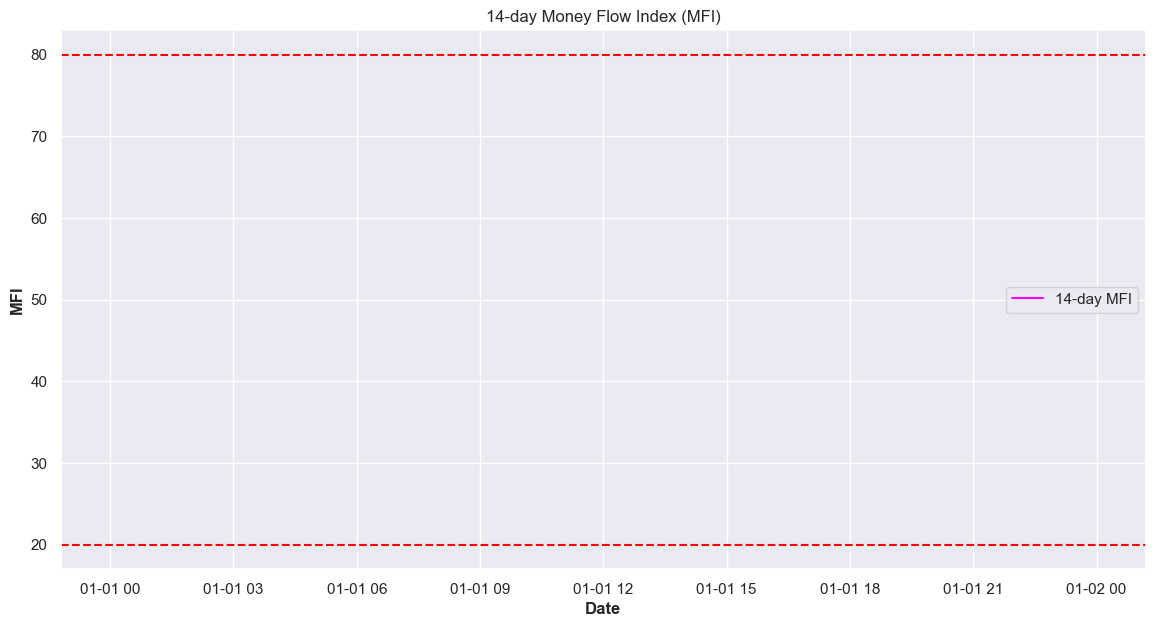

In [51]:

def calculate_mfi(df, window):
    typical_price = (df['high'] + df['low'] + df['close']) / 3
    money_flow = typical_price * df['volume']
    
    positive_flow = []
    negative_flow = []
    for i in range(1, len(typical_price)):
        if typical_price[i] > typical_price[i - 1]:
            positive_flow.append(money_flow[i])
            negative_flow.append(0)
        elif typical_price[i] < typical_price[i - 1]:
            positive_flow.append(0)
            negative_flow.append(money_flow[i])
        else:
            positive_flow.append(0)
            negative_flow.append(0)

    positive_mf = pd.Series(positive_flow).rolling(window=window).sum()
    negative_mf = pd.Series(negative_flow).rolling(window=window).sum()

    mfi = 100 - (100 / (1 + positive_mf / negative_mf))
    return mfi

df['MFI_14'] = calculate_mfi(df, 14)


plt.figure(figsize=(14, 7))
plt.plot(df.index, df['MFI_14'], label='14-day MFI', color='magenta')
plt.axhline(y=80, color='red', linestyle='--')
plt.axhline(y=20, color='red', linestyle='--')
plt.title('14-day Money Flow Index (MFI)')
plt.xlabel('Date')
plt.ylabel('MFI')
plt.legend()
plt.show()

# Exploratory Data Analysis - EDA

In [52]:
print("Statistical Summary:")
print(df.describe())

Statistical Summary:
        Unnamed: 0          open           high           low         close  \
count  2087.000000   2087.000000    2087.000000   2087.000000   2087.000000   
mean   1044.000000  51890.532343   52497.945376  51301.346430  51922.216579   
std     602.609326  21749.016438   21942.999081  21527.070392  21753.154649   
min       1.000000  17450.000000   18090.000000  17180.000000  17450.000000   
25%     522.500000  34380.000000   35010.000000  34010.000000  34490.000000   
50%    1044.000000  53990.000000   54510.000000  53600.000000  53990.000000   
75%    1565.500000  66890.000000   67695.000000  65860.000000  66820.000000   
max    2087.000000  98500.000000  100500.000000  97300.000000  97400.000000   

             volume         MA_10         MA_50        EMA_10        EMA_50  \
count  2.087000e+03   2078.000000   2038.000000   2087.000000   2087.000000   
mean   1.284076e+06  51906.378248  51830.358489  51766.453804  51066.734368   
std    8.286023e+05  21635.159

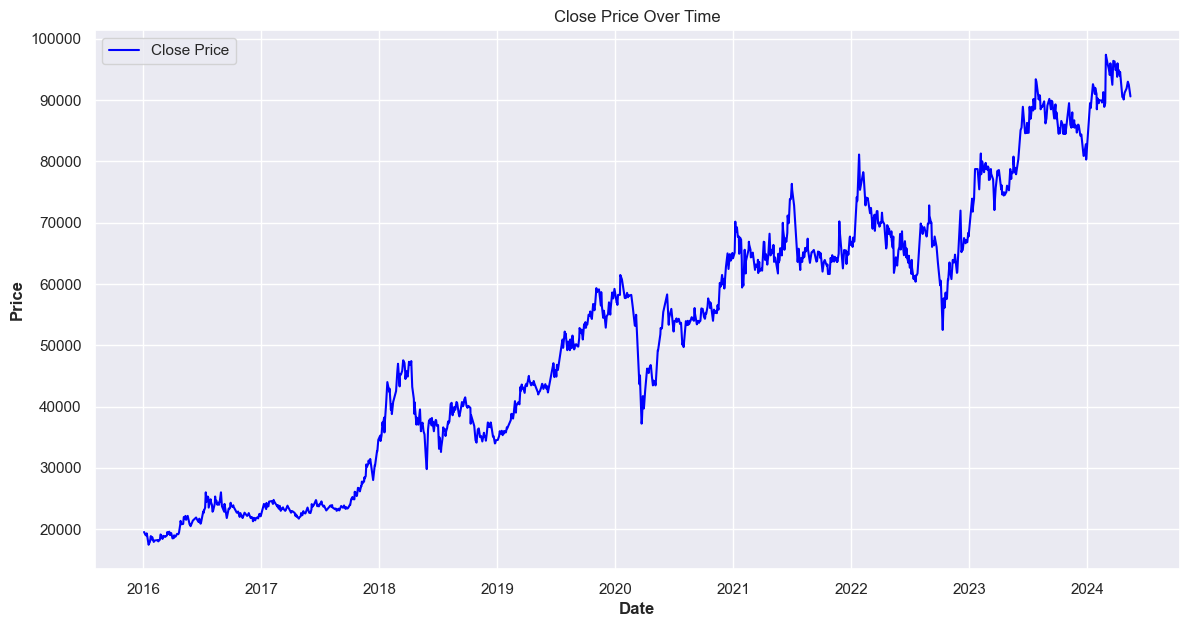

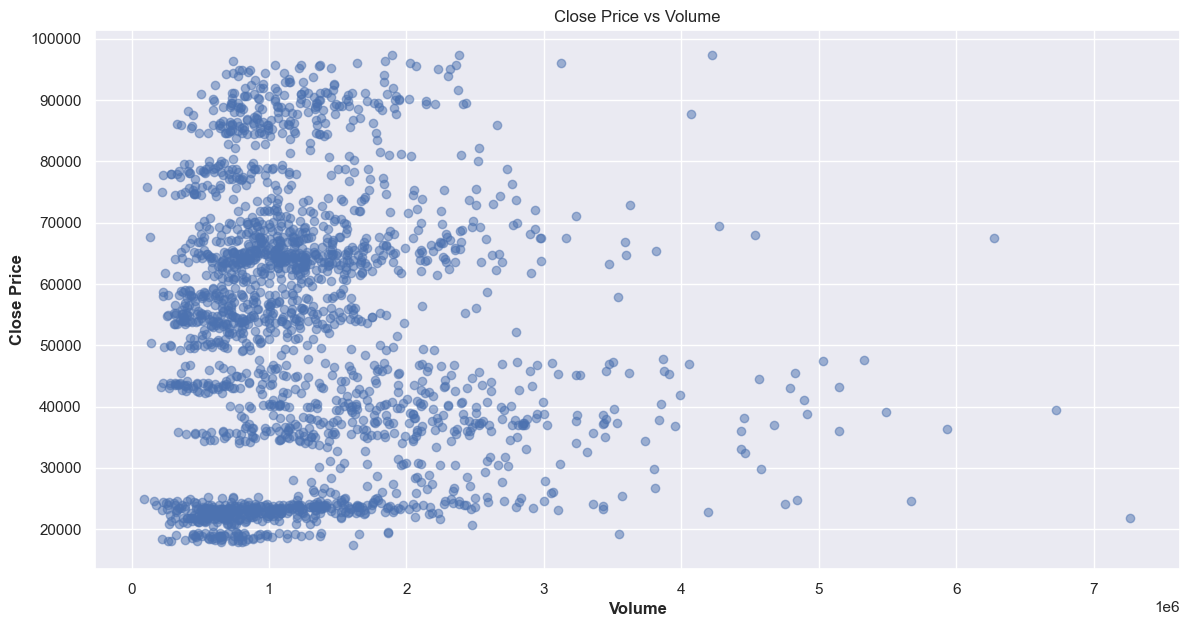

In [53]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['close'], label='Close Price', color='blue')
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Candlestick figure
# df_candlestick = df[['open', 'high', 'low', 'close', 'volume']]
# mpf.plot(df_candlestick, type='candle', volume=True, style='charles', title='Candlestick Chart')

# Close and volume figure
plt.figure(figsize=(14, 7))
plt.scatter(df['volume'], df['close'], alpha=0.5)
plt.title('Close Price vs Volume')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.show()

# Correlation matrix
# corr_matrix = df.drop(columns=['ticker']).corr()
# plt.figure(figsize=(14, 7))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.show()




# Feature Engineering
# Biểu đồ Bollinger Bands

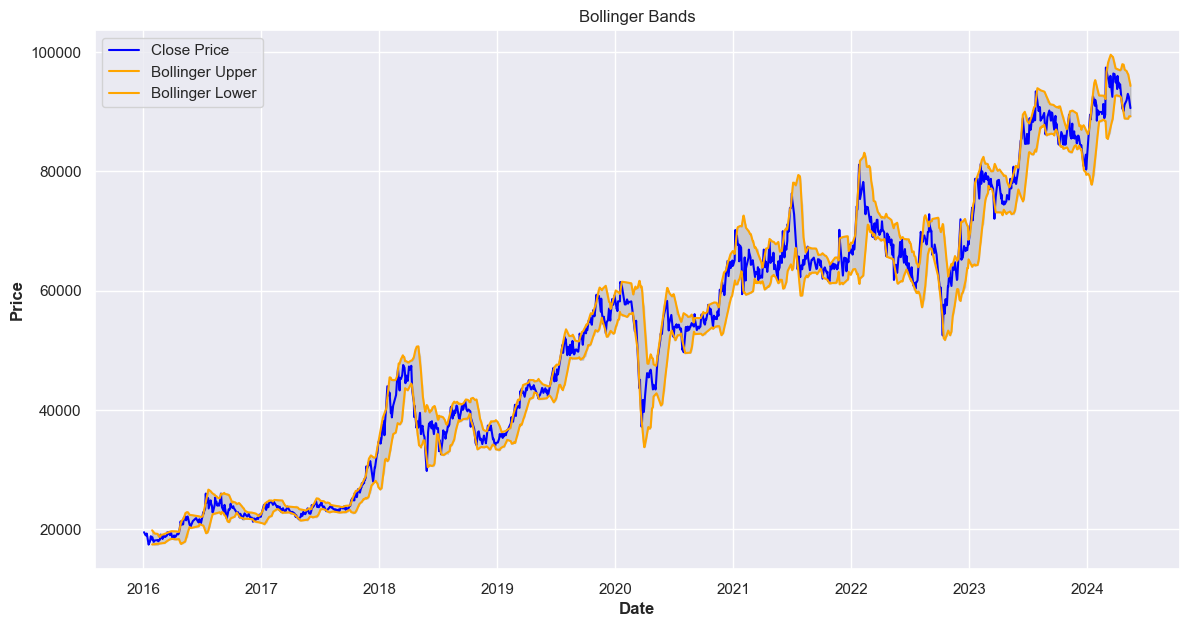

In [54]:
# Log-return
df['Log_Return'] = np.log(df['close'] / df['close'].shift(1))

# Rolling mean and rolling standard deviation
df['Rolling_Mean_20'] = df['close'].rolling(window=20).mean()
df['Rolling_Std_20'] = df['close'].rolling(window=20).std()


df['Bollinger_Upper'] = df['Rolling_Mean_20'] + (df['Rolling_Std_20'] * 2)
df['Bollinger_Lower'] = df['Rolling_Mean_20'] - (df['Rolling_Std_20'] * 2)


plt.figure(figsize=(14, 7))
plt.plot(df.index, df['close'], label='Close Price', color='blue')
plt.plot(df.index, df['Bollinger_Upper'], label='Bollinger Upper', color='orange')
plt.plot(df.index, df['Bollinger_Lower'], label='Bollinger Lower', color='orange')
plt.fill_between(df.index, df['Bollinger_Upper'], df['Bollinger_Lower'], color='grey', alpha=0.3)
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
